## Data Cleaning with Pandas: Hands On

Cleansing data gede pake sql
ploting pake python jyupiter notebook


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__


'1.5.3'

### Part 1: Basics of Pandas & Categorical Column Encoding

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- Survived: 0 berarti 'tidak selamat', 1 berarti 'selamat'
- Pclass: kelas tiket, 1 = kelas 1 (paling mewah), 2 = kelas 2, 3 = kelas 3 (paling rendah)
- Sex: jenis kelamin
- Age: usia
- SibSp: berapa banyak sibling/spouses yang ikut serta di dalam Titanic
- Parch: berapa banyak parents/children yang ikut serta di dalam Titanic
- Fare: uang yang dibayarkan (biaya) untuk perjalanan
- Class: sama dengan Pclass, tapi di'spell' dengan kata-kata
- Deck: kabin kapal
- Embarked: kota keberangkatan, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [ ]:
titanic.tail(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True,0
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False,5
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True,0
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True,0


Filtering with more than 1 conditions

In [ ]:
# Filter: yang pria, selamat, dan memiliki passenger class 2 dan 3 (bukan penumpang kelas 1)

kondisi_1 = titanic['sex'] == 'male'
kondisi_2 = titanic['survived'] == 1

kondisi_3_alternatif_1 = titanic['pclass'] > 1
kondisi_3_alternatif_2 = titanic['pclass'] != 1
kondisi_3_alternatif_3 = (titanic['pclass'] == 2) | (titanic['pclass'] == 3)
kondisi_3_alternatif_4 = titanic['pclass'].isin([2,3])
kondisi_all = kondisi_1 & kondisi_2 & kondisi_3_alternatif_3

tabel_pria_selamat_bukan_kelas_satu = titanic[kondisi_all].reset_index(drop = True)

In [ ]:
tabel_pria_selamat_bukan_kelas_satu

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,0
1,1,2,male,34.00,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True,0
2,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True,0
3,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False,2
4,1,3,male,32.00,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False,2
60,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True,0
61,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False,2
62,1,3,male,32.00,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,0


Adding new column

In [ ]:
# suppose the new column is the sum of sibsp and parch
titanic['relatives'] = titanic['sibsp'] + titanic['parch']

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


One-Hot Encoding on the 'embarked' column:

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [ ]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0


In [ ]:
#kolom baru dg text dg text
titanic['kolom_baru'] = titanic['sex'] + ' ' + titanic['who']

In [ ]:
kolom_yang_mau_di_one_hot = ['sex', 'embarked']

titanic[  kolom_yang_mau_di_one_hot  ]

,sex,embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
# one-hot encoding on embarked and sex column
pd.get_dummies(titanic[  kolom_yang_mau_di_one_hot  ])

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
titanic_habis_onehot = titanic.join(pd.get_dummies(titanic[  kolom_yang_mau_di_one_hot  ]))

In [ ]:
titanic_habis_onehot

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,relatives,kolom_baru,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,1,male man,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,1,female woman,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,female woman,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,1,female woman,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,0,male man,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,Southampton,no,True,0,male man,0,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,Southampton,yes,True,0,female woman,1,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,Southampton,no,False,3,female woman,1,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,0,male man,0,1,1,0,0


Rank Encoding on 'class' column

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
pemetaan_kelas = {
    'First':1,
    'Second':2,
    'Third':3,
}

In [ ]:
titanic['rank_class'] = titanic['class'].map(pemetaan_kelas)

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives,kolom_baru
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,male man
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,female woman
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,female woman
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,female woman
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,male man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,male man
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,female woman
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3,female woman
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,male man


In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives,kolom_baru
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,male man
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,female woman
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,female woman
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,female woman
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,male man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,male man
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,female woman
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3,female woman
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,male man


Cara menghilangkan kolom

In [ ]:
titanic.drop(['pclass','sex', 'embarked'], axis = 'columns', inplace = True)

In [ ]:
titanic

,survived,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,relatives,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,rank_class
0,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,0,1,0,1,3
1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,1,0,0,1,0,1
2,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,0,1,1,0,3
3,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,1,0,0,1,1,0,1
4,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,0,1,0,0,0,1,1
890,0,32.0,0,0,7.7500,Third,man,True,NaN,Queenstown,no,True,0,0,1,0,0,1,3
891,0,33.0,0,0,1.2500,Third,man,True,C,Southampton,no,True,0,0,0,1,0,1,3
892,0,33.0,0,0,1.2500,Third,man,True,C,Southampton,no,True,0,0,0,1,0,1,3


### Part 2: Missing Value

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/titanic_passenger.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic_ori = titanic.copy()

In [ ]:
titanic

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Deck
0,0,male,22.0,1,0,7.2500,S,Third,NaN
1,1,female,38.0,1,0,71.2833,C,First,C
2,1,female,26.0,0,0,7.9250,S,Third,NaN
3,1,female,35.0,1,0,53.1000,S,First,C
4,0,male,35.0,0,0,8.0500,S,Third,NaN
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,NaN
887,1,female,19.0,0,0,30.0000,S,First,B
888,0,female,NaN,1,2,23.4500,S,Third,NaN
889,1,male,26.0,0,0,30.0000,C,First,C


- Survived: 0 berarti 'tidak selamat', 1 berarti 'selamat'
- Pclass: kelas tiket, 1 = kelas 1 (paling mewah), 2 = kelas 2, 3 = kelas 3 (paling rendah)
- Sex: jenis kelamin
- Age: usia
- SibSp: berapa banyak sibling/spouses yang ikut serta di dalam Titanic
- Parch: berapa banyak parents/children yang ikut serta di dalam Titanic
- Fare: uang yang dibayarkan (biaya) untuk perjalanan
- Class: sama dengan Pclass, tapi di'spell' dengan kata-kata
- Deck: kabin kapal
- Embarked: kota keberangkatan, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Sex             891 non-null    object 
 2   Age             714 non-null    float64
 3   SiblingsSpouse  891 non-null    int64  
 4   ParentChildren  891 non-null    int64  
 5   Fare            891 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           891 non-null    object 
 8   Deck            203 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [ ]:


# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Display columns with missing values
columns_with_missing_values = titanic.columns[titanic.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# Display the count of missing values in each column
missing_values_count = titanic.isnull().sum()
print("\nMissing values count per column:")
print(missing_values_count)

Columns with missing values: ['Age', 'EmbarkedCity', 'Deck']

Missing values count per column:
Survived            0
Sex                 0
Age               177
SiblingsSpouse      0
ParentChildren      0
Fare                0
EmbarkedCity        2
Class               0
Deck              688
dtype: int64


In [ ]:
(891-203)/891

0.7721661054994389

In [ ]:
titanic

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Deck
0,0,male,22.0,1,0,7.2500,S,Third,NaN
1,1,female,38.0,1,0,71.2833,C,First,C
2,1,female,26.0,0,0,7.9250,S,Third,NaN
3,1,female,35.0,1,0,53.1000,S,First,C
4,0,male,35.0,0,0,8.0500,S,Third,NaN
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,NaN
887,1,female,19.0,0,0,30.0000,S,First,B
888,0,female,NaN,1,2,23.4500,S,Third,NaN
889,1,male,26.0,0,0,30.0000,C,First,C


#### Method 1: Drop the Column

Jika kolom tersebut memiliki banyak missing values (lebih dari 50-60%), maka sulit rasanya bisa mendapatkan metode imputasi yang akurat. Apalagi, jika kolom tersebut dirasa memiliki informasi yang minim.

Jika hal ini terjadi, maka hal yang dapat dilakukan adalah menghilangkan seluruh kolom (tidak menggunakan kolom tersebut dalam EDA / Modelling). Hal ini yang akan kita lakukan kepada kolom `Deck`.

In [ ]:
203/891

0.22783389450056116

In [ ]:
kolom_yang_ingin_dibuang = ['Deck']
titanic_without_deck = titanic.drop(kolom_yang_ingin_dibuang, axis = 'columns')

In [ ]:
kolom_yang_ingin_dibuang = titanic.pop('Deck')

In [ ]:
titanic_without_deck=titanic.copy

In [ ]:
titanic_without_deck

<bound method NDFrame.copy of      Survived     Sex   Age  SiblingsSpouse  ParentChildren     Fare  \
0           0    male  22.0               1               0   7.2500   
1           1  female  38.0               1               0  71.2833   
2           1  female  26.0               0               0   7.9250   
3           1  female  35.0               1               0  53.1000   
4           0    male  35.0               0               0   8.0500   
..        ...     ...   ...             ...             ...      ...   
886         0    male  27.0               0               0  13.0000   
887         1  female  19.0               0               0  30.0000   
888         0  female   NaN               1               2  23.4500   
889         1    male  26.0               0               0  30.0000   
890         0    male  32.0               0               0   7.7500   

    EmbarkedCity   Class  
0              S   Third  
1              C   First  
2              S   Third

Kolom `Deck` sudah tidak ada di dataframe kita^.

In [ ]:
titanic_without_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Sex             891 non-null    object 
 2   Age             714 non-null    float64
 3   SiblingsSpouse  891 non-null    int64  
 4   ParentChildren  891 non-null    int64  
 5   Fare            891 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


#### Method 2: Remove the Rows

Apabila missing values kurang dari 50%, maka hal yang dapat dilakukan adalah menghilangkan semua baris dengan missing values. Ini adalah metode yang paling 'mudah', namun memiliki beberapa konsekuensi:
- Kehilangan informasi dari kolom lain yang penting (dalam kebanyakan kasus, baris yang dihilangkan itu sebenarnya tidak bermasalah di kolom-kolom lain)
- Dataset size menjadi sedikit, bila yang dihilangkan cukup banyak

In [ ]:
### Mau menghilangkan yang NULL untuk kolom Embarked aja
### KEEP the Missing Value in kolom Age

In [ ]:
titanic_without_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Sex             891 non-null    object 
 2   Age             714 non-null    float64
 3   SiblingsSpouse  891 non-null    int64  
 4   ParentChildren  891 non-null    int64  
 5   Fare            891 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
syarat_age = titanic_without_deck['Age'].isnull()
syarat_city = titanic_without_deck['EmbarkedCity'].isnull()

#embark city kosong
titanic_without_deck[syarat_city]



,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
61,1,female,38.0,0,0,80.0,NaN,First
829,1,female,62.0,0,0,80.0,NaN,First


In [ ]:
#embark city yg tidak kosong
titanic_without_deck[~syarat_city]

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second
887,1,female,19.0,0,0,30.0000,S,First
888,0,female,NaN,1,2,23.4500,S,Third
889,1,male,26.0,0,0,30.0000,C,First


In [ ]:
# kolom embarked city yang tidak kosong DAN kolom age nya tidak kosong
syarat_tidak_kosong = (~syarat_age) & (~syarat_city)
titanic_clean = titanic_without_deck[syarat_tidak_kosong].reset_index(drop = True)

In [ ]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        712 non-null    int64  
 1   Sex             712 non-null    object 
 2   Age             712 non-null    float64
 3   SiblingsSpouse  712 non-null    int64  
 4   ParentChildren  712 non-null    int64  
 5   Fare            712 non-null    float64
 6   EmbarkedCity    712 non-null    object 
 7   Class           712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 44.6+ KB


In [ ]:
# kolom embarked city yang tidak kosong DAN kolom age nya tidak kosong
syarat_tidak_kosong = (~syarat_age & ~syarat_city)
titanic_clean = titanic_without_deck[syarat_tidak_kosong].reset_index(drop = True)

In [ ]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        712 non-null    int64  
 1   Sex             712 non-null    object 
 2   Age             712 non-null    float64
 3   SiblingsSpouse  712 non-null    int64  
 4   ParentChildren  712 non-null    int64  
 5   Fare            712 non-null    float64
 6   EmbarkedCity    712 non-null    object 
 7   Class           712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 44.6+ KB


In [ ]:
titanic_without_deck

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second
887,1,female,19.0,0,0,30.0000,S,First
888,0,female,NaN,1,2,23.4500,S,Third
889,1,male,26.0,0,0,30.0000,C,First


In [ ]:
kondisi = titanic_without_deck['EmbarkedCity'].isnull()

titanic_without_deck[kondisi]

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
61,1,female,38.0,0,0,80.0,NaN,First
829,1,female,62.0,0,0,80.0,NaN,First


In [ ]:
titanic_without_deck[~kondisi]
titanic_new = titanic_without_deck[~kondisi].reset_index(drop = True)

In [ ]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Sex             889 non-null    object 
 2   Age             712 non-null    float64
 3   SiblingsSpouse  889 non-null    int64  
 4   ParentChildren  889 non-null    int64  
 5   Fare            889 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.7+ KB


In [ ]:
177/889

0.19910011248593926

In [ ]:
titanic_new[titanic_new['Age'].isnull()]

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
5,0,male,NaN,0,0,8.4583,Q,Third
17,1,male,NaN,0,0,13.0000,S,Second
19,1,female,NaN,0,0,7.2250,C,Third
26,0,male,NaN,0,0,7.2250,C,Third
28,1,female,NaN,0,0,7.8792,Q,Third
...,...,...,...,...,...,...,...,...
857,0,male,NaN,0,0,7.2292,C,Third
861,0,female,NaN,8,2,69.5500,S,Third
866,0,male,NaN,0,0,9.5000,S,Third
876,0,male,NaN,0,0,7.8958,S,Third


In [ ]:
titanic_new[
    (titanic_new['Sex'] == 'male') &
    (titanic_new['Survived'] == 0) &
    (titanic_new['EmbarkedCity'] == 'Q')
]

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class
5,0,male,NaN,0,0,8.4583,Q,Third
16,0,male,2.0,4,1,29.1250,Q,Third
46,0,male,NaN,1,0,15.5000,Q,Third
115,0,male,70.5,0,0,7.7500,Q,Third
125,0,male,NaN,0,0,7.7500,Q,Third
142,0,male,19.0,0,0,6.7500,Q,Third
170,0,male,4.0,4,1,29.1250,Q,Third
187,0,male,40.0,1,1,15.5000,Q,Third
195,0,male,NaN,0,0,7.7500,Q,Third
213,0,male,NaN,1,0,7.7500,Q,Third


In [ ]:
titanic_new.groupby(['Survived', 'Sex', 'EmbarkedCity'])['Age'].median().reset_index()

,Survived,Sex,EmbarkedCity,Age
0,0,female,C,17.50
1,0,female,Q,30.50
2,0,female,S,25.00
3,0,male,C,30.00
4,0,male,Q,31.00
5,0,male,S,28.25
6,1,female,C,27.00
7,1,female,Q,19.00
8,1,female,S,29.00
9,1,male,C,26.50


In [ ]:
titanic_new = titanic_new[~(titanic_new['Age'].isnull())].reset_index(drop = True)

In [ ]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        712 non-null    int64  
 1   Sex             712 non-null    object 
 2   Age             712 non-null    float64
 3   SiblingsSpouse  712 non-null    int64  
 4   ParentChildren  712 non-null    int64  
 5   Fare            712 non-null    float64
 6   EmbarkedCity    712 non-null    object 
 7   Class           712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 44.6+ KB


### Part 3: Outliers

Untuk membahas outlier, maka kita pakai data Boston Property Price.

In [ ]:
boston_df = pd.read_csv('boston_df.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


 - CRIM:     per capita crime rate by town
 - ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS:    proportion of non-retail business acres per town
 - CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX:      nitric oxides concentration (parts per 10 million)
 - RM:       average number of rooms per dwelling
 - AGE:      proportion of owner-occupied units built prior to 1940
 - DIS:      weighted distances to five Boston employment centres
 - RAD:      index of accessibility to radial highways
 - TAX:      full-value property-tax rate per USD 10,000
 - PTRATIO:  pupil-teacher ratio by town
 - LSTAT:    % lower status of the population
 - TARGET:     Median value of owner-occupied homes in USD 1000's

#### Univariate Outlier Analysis

Sekarang, mari kita gunakan boxplot untuk melihat kolom `DIS`, apakah terdapat outlier atau tidak

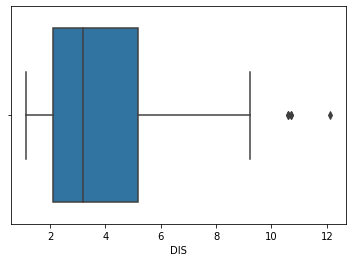

In [ ]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])
plt.show()

Berarti, terdapat beberapa outlier, yaitu yang `DIS` nya > 10.

Untuk univariate outlier analysis, kita mengukur:
- Q1 dan Q3 dari kolom tersebut
- IQR = Q3 - Q1 dari kolom tersebut
- Apakah ada data yang < Q1 - 1.5 * IQR, atau data yang > Q3 + 1.5 * IQR? Jika ada, maka data tersebut merupakan Outlier.

Untuk mencari baris mana saja yang outlier, kita bisa menggunakan bantuan fungsi di bawah ini:

In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                 else 'not-outlier' for x in data[column].values]


In [ ]:
q3 = boston_df['DIS'].quantile(0.75)
q1 = boston_df['DIS'].quantile(0.25)
iqr = q3-q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

In [ ]:
#mencari baris mana saja yg outlier vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
syarat_1 = boston_df['DIS'] < batas_bawah
syarat_2 = boston_df['DIS'] > batas_atas

syarat_all = syarat_1 | syarat_2

outlier_boston_df = boston_df[syarat_all]
outlier_boston_df

NameError: name 'boston_df' is not defined

In [ ]:
outlier_kolom_dis = boston_df[ ( boston_df['DIS'] < batas_bawah ) | (boston_df['DIS'] > batas_atas)]

In [ ]:
outlier_kolom_dis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,TARGET
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,5.57,20.6


In [ ]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [ ]:
boston_df['outlier_DIS'] = check_outlier(data=boston_df, column='DIS')

In [ ]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,TARGET,outlier_DIS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,not-outlier
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,not-outlier
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,not-outlier
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,not-outlier
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,not-outlier
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,not-outlier
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,not-outlier
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,not-outlier


In [ ]:
boston_df[boston_df['outlier_DIS'] == 'outlier']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,TARGET,outlier_DIS
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,5.49,24.1,outlier
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,7.79,18.6,outlier
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,4.50,30.1,outlier
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,8.05,18.2,outlier
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,5.57,20.6,outlier


##### Pertanyaan Follow-Up untuk Kelas Machine Learning:

1. Apakah setiap fitur harus di-check outliers nya?
2. Apa dampak adanya outliers dalam Machine Learning?
3. Apakah outliers harus dihapus?
4. Apakah outlier handling bisa dengan melakukan normalisasi, standardisasi, atau logaritma?
5. Kapan kita harus melakukan feature scaling untuk membuang outlier?
6. Apa setiap fitur harus di-scaling ketika mau melakukan machine learning?